In [1]:
import mxnet as mx
import matplotlib.pyplot as plt
from mxnet import image,nd,contrib
import sys
import numpy as np
sys.path.insert(0,'..')
np.set_printoptions(2)

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
img =image.imread('../img/catdog.jpg').asnumpy()

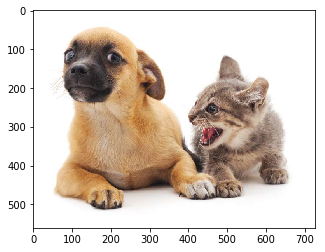

In [3]:
fig = plt.imshow(img)

In [4]:
dog_box,cat_box = [60, 45, 378, 516], [400, 112, 655, 493]

In [5]:
def bbox_to_rect(bbox,color):
    return plt.Rectangle((bbox[0],bbox[1]),width=bbox[2]-bbox[0],height=bbox[3]-bbox[1],fill=False,edgecolor=color,linewidth=2)
    

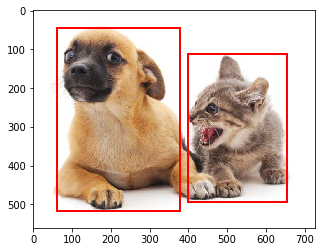

In [6]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_box,'r'))
fig.axes.add_patch(bbox_to_rect(cat_box,'r'))

In [44]:
X = nd.random.uniform(shape=(10,3,img.shape[0],img.shape[1]))
X


[[[[0.55 0.59 0.72 ... 0.09 0.46 0.91]
   [0.88 0.08 0.46 ... 0.19 0.99 0.92]
   [0.76 0.58 0.36 ... 0.79 0.12 0.97]
   ...
   [0.42 0.94 0.57 ... 0.15 0.15 0.15]
   [0.24 0.03 0.03 ... 0.22 0.39 0.39]
   [0.42 0.61 0.58 ... 0.95 1.   0.  ]]

  [[0.08 0.74 0.59 ... 0.55 0.85 0.39]
   [0.7  0.72 0.78 ... 0.34 0.63 0.01]
   [0.56 0.87 0.89 ... 0.96 0.66 0.54]
   ...
   [0.8  0.34 0.84 ... 0.38 0.61 0.9 ]
   [0.39 0.65 0.48 ... 0.42 0.71 0.85]
   [0.09 0.38 0.66 ... 0.32 0.16 0.42]]

  [[0.37 0.72 0.93 ... 0.52 0.93 0.83]
   [0.09 0.28 0.01 ... 0.87 0.82 0.83]
   [0.22 0.44 0.9  ... 0.55 0.7  0.62]
   ...
   [0.03 0.13 0.1  ... 0.16 0.24 0.63]
   [0.54 0.87 0.67 ... 0.47 0.86 0.06]
   [0.1  0.75 0.88 ... 0.95 0.61 1.  ]]]


 [[[0.34 0.53 0.33 ... 0.24 0.15 0.1 ]
   [0.49 0.43 0.53 ... 0.28 0.82 0.3 ]
   [0.58 0.19 0.6  ... 0.35 0.36 0.58]
   ...
   [0.5  0.58 0.72 ... 0.83 0.07 0.5 ]
   [0.91 0.9  0.87 ... 0.11 0.56 0.61]
   [0.   0.75 0.51 ... 0.71 0.96 0.23]]

  [[0.67 0.08 0.42 ... 0.

In [45]:
anchors = contrib.nd.MultiBoxPrior(X,sizes=[0.2,0.5,0.75],ratios=[0.5,1,2])

In [46]:
anchors.shape

(1, 2042040, 4)

# 显示所有锚框的函数

In [9]:
def show_bboxes(axes,bboxes,labels=None,colors=None):
    def _make_list(obj,defaultvalue=None):
        if obj is None:
            obj = defaultvalue
        elif not isinstance(obj,(list,tuple)):
            obj = [obj]
        return obj
    
    labels = _make_list(labels)
    colors = _make_list(colors,['b','g','r','m','c'])
    #下面开始绘制图像
    for i,bbox in enumerate(bboxes):
        #获取bbox背景颜色
        color = colors[i%len(colors)]
        rect = bbox_to_rect(bbox.asnumpy(),color)
        axes.add_patch(rect)
        #添加标签
        if labels and len(labels)>i:
            text_color = 'k' if color=='w' else 'w'
            axes.text(x=rect.xy[0],y=rect.xy[1],s=labels[i],
                     va='center',ha='center',fontsize=10,color=text_color,
                     bbox=dict(facecolor=color,lw=0))            

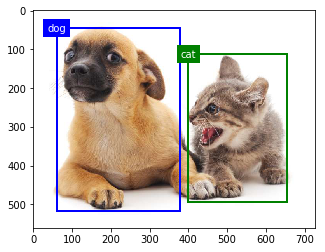

In [10]:
fig = plt.imshow(img)
show_bboxes(fig.axes,nd.array([dog_box,cat_box]),labels=['dog','cat'])

## 生成标注框的函数

In [47]:
anchors = nd.array([[0, 0.1, 0.2, 0.3], [0.15, 0.2, 0.4, 0.4],
                    [0.63, 0.05, 0.88, 0.98], [0.66, 0.45, 0.8, 0.8],
                    [0.57, 0.3, 0.92, 0.9]])
print(anchors.shape)
ground_truth = nd.array([[[0,0.1,0.08,0.52,0.92],
                       [1,0.55,0.2,0.9,0.88],
                         [-1,-1,-1,-1,-1]],

                        [[0,0.1,0.08,0.52,0.92],
                       [1,0.55,0.2,0.9,0.88],
                        [-1,-1,-1,-1,-1]]])


ground_truth_ttttt = nd.array([[[0,0.1,0.08,0.52,0.92],
                       [1,0.55,0.2,0.9,0.88]],

                        [[0,0.1,0.08,0.52,0.92],
                       [1,0.55,0.2,0.9,0.88]]])
print(ground_truth.shape)
cls_pred = nd.random.uniform(shape=(2,3,5))
print(cls_pred.shape)

(5, 4)
(2, 3, 5)
(2, 3, 5)


In [48]:
outputs_no_mining = contrib.nd.MultiBoxTarget(anchor = anchors.expand_dims(axis=0),label= ground_truth,
                                   cls_pred = cls_pred)
outputs_no_mining_ttt =contrib.nd.MultiBoxTarget(anchor = anchors.expand_dims(axis=0),label= ground_truth_ttttt,
                                   cls_pred = cls_pred)
outputs_mining = contrib.nd.MultiBoxTarget(anchor = anchors.expand_dims(axis=0),label= ground_truth,
                                   cls_pred = cls_pred,negative_mining_ratio = 0.5,minimum_negative_samples =1)

In [52]:
type(outputs_mining)

list

In [49]:
print(outputs_no_mining[2]==outputs_no_mining_ttt[2])


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 2x5 @cpu(0)>


In [50]:
print(outputs_no_mining[2])
print(outputs_mining[2])
print(outputs_mining[2].shape)


[[0. 1. 2. 0. 2.]
 [0. 1. 2. 0. 2.]]
<NDArray 2x5 @cpu(0)>

[[ 0.  1.  2. -1.  2.]
 [ 0.  1.  2. -1.  2.]]
<NDArray 2x5 @cpu(0)>
(2, 5)


In [51]:
from mxnet.gluon import loss as gloss

In [16]:
loss = gloss.SoftmaxCrossEntropyLoss()

In [17]:
y_hat = nd.uniform(shape=(5,3))
y = nd.array((-1,-1,-1,-1,1)).reshape(5,1)

In [18]:
weight = y>=0
weight


[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
<NDArray 5x1 @cpu(0)>

In [19]:
loss(y_hat,y,weight.reshape(5,1,1))


[0.        0.        0.        0.        1.0822469]
<NDArray 5 @cpu(0)>

In [20]:
pred_cls = nd.uniform(shape=(2,5,3))
cls_labels = nd.array(([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])).reshape(2,-1)

In [21]:
cls_labels
weight = cls_labels>=0

In [22]:
weight


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 2x5 @cpu(0)>

In [23]:
loss(pred_cls,cls_labels)


[1.2757384 1.1739649]
<NDArray 2 @cpu(0)>

In [24]:
loss(pred_cls,cls_labels,weight.reshape(2,5,1))


[0. 0.]
<NDArray 2 @cpu(0)>

## 输出预测边界框

* 注意这里的cls_prob 形状为（批量大小，总类别数，锚框总数）

In [53]:
cls_probs = nd.array([[0] * 4, # 背景的预测概率。
                      [0.9, 0.8, 0.7, 0.1], # 狗的预测概率。
                      [0.1, 0.2, 0.3, 0.9]]) # 猫的预测概率
cls_probs.shape

(3, 4)

In [39]:
cls_probs_test = nd.array([[0.1,0.3,0.6,0.2], # 背景的预测概率。
                          [0.9, 0.7, 0.4, 0.1]] # 狗的预测概率。
                      ) 

* anchor 形状为（批量大小，锚框总数，4）

In [40]:
anchors = nd.array([[0.1,0.08,0.52,0.92],[0.08,0.2,0.56,0.95],
                   [0.15,0.3,0.62,0.91],[0.55,0.2,0.9,0.88]])

anchors.shape

(4, 4)

* loc_pred 形状应为（批量大小，锚框总数*4）

In [41]:
offset_preds = nd.array([0]*anchors.size)
offset_preds.shape


(16,)

In [42]:
outputs = contrib.ndarray.MultiBoxDetection(cls_probs_test.expand_dims(axis=0)
                                           ,offset_preds.expand_dims(axis=0),
                                            anchors.expand_dims(axis=0),nms_threshold=0.5,threshold=0.05)
outputs


[[[ 0.    0.9   0.1   0.08  0.52  0.92]
  [-1.    0.7   0.08  0.2   0.56  0.95]
  [-1.    0.4   0.15  0.3   0.62  0.91]
  [ 0.    0.1   0.55  0.2   0.9   0.88]]]
<NDArray 1x4x6 @cpu(0)>

NameError: name 'show_bboxes' is not defined

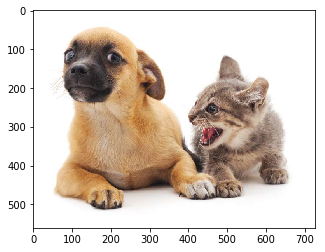

In [43]:
img = image.imread('../img/catdog.jpg').asnumpy()
h,w = img.shape[0],img.shape[1]
img_scale = nd.array([w,h,w,h])
fig=plt.imshow(img)
show_bboxes(fig.axes,anchors*img_scale,labels=['dog=0.9', 'dog=0.8', 'dog=0.7', 'cat=0.9'])

In [44]:
outputs = contrib.ndarray.MultiBoxDetection(cls_probs.expand_dims(axis=0)
                                           ,offset_preds.expand_dims(axis=0),
                                            anchors.expand_dims(axis=0),nms_threshold=0.5)
outputs


[[[ 0.    0.9   0.1   0.08  0.52  0.92]
  [ 1.    0.9   0.55  0.2   0.9   0.88]
  [-1.    0.8   0.08  0.2   0.56  0.95]
  [-1.    0.7   0.15  0.3   0.62  0.91]]]
<NDArray 1x4x6 @cpu(0)>

* 输出形状为 （批量大小，锚框总数，6）
* 其中最后一维第一个元素表示锚框的类别，-1表示该锚框为背景框或者在NMS过程中被删除
* 最后一维第二个元素表示该锚框的置信度
* 最后一维最后四个元素为锚框的四个坐标

In [67]:
boxes = []
for i in outputs.asnumpy()[0]:
    boxes.append(i[2:])
print(nd.array(boxes)*img_scale)


[[ 72.8   44.88 378.56 516.12]
 [400.4  112.2  655.2  493.68]
 [ 58.24 112.2  407.68 532.95]
 [109.2  168.3  451.36 510.51]]
<NDArray 4x4 @cpu(0)>


In [86]:
def show_nms_bbox(axes,nms_bboxes,colors=None):
    bboxes = []
    labels = []
    for nms_bbox in nms_bboxes[0].asnumpy():
        if(nms_bbox[0]>=0):
            if nms_bbox[0]==0 :
                label = 'dog'
            else:
                label = 'cat'
            bboxes.append(nms_bbox[2:])
            labels.append(label+str(nms_bbox[1])) 
            
    bboxes = nd.array(bboxes)
    print(bboxes)
    show_bboxes(axes,bboxes*img_scale,labels)     


[[0.1  0.08 0.52 0.92]
 [0.55 0.2  0.9  0.88]]
<NDArray 2x4 @cpu(0)>


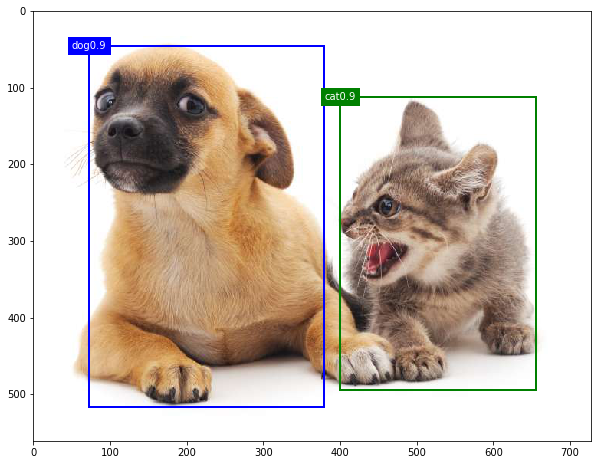

In [87]:
plt.figure(figsize=(10,10))
fig=plt.imshow(img)
show_nms_bbox(fig.axes,outputs)